# Statistics Assignment : Analysis of Investment

# Business and Data Understanding

### spark Funds wants to invest where most other investors are investing. 
### Data is taken from crunchbase.com

# Conditions for Analysis

    - invest only in English-speaking countries
    - invest between 5 to 15 million USD

# Result Expected

    - Choosing the type of investment
    - Choosing the country to invest
    - Choosing the sector

## File Details:
        - companies.csv - It has the basic data related to the company
        - rounds2.csv - It has data related to funding
        - mapping.csv - It has details about the 8 sectors

# Checkpoints - Part 1

## Checkpoint 1: Data Cleaning 1

##### Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [1]:
#### importing the Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
### Chardet library import
import chardet
### The chardet is used to detect the encoding used in the file. The whole data is taken into account, 
### since the first few records analysis didnt give proper data

with open("companies.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


##### Encoding Type suggested by Chardet has the confidence level of 46%. It cannot be used for encoding. Hence taking different encoding.

In [3]:
###Opening the files companies.csv and rounds2.csv in to the dataframe companies and rounds. The file is encoded. 
###So the file is opened with the value "encoding=palmos"
companies = pd.read_csv("companies.csv",  encoding="palmos")
rounds2 = pd.read_csv("rounds2.csv",  encoding="palmos")

## Cleaning Data

In [4]:
## Company data encoding and decoding
companies.permalink = companies.permalink.str.encode('palmos').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('palmos').str.decode('ascii', 'ignore')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
## Rounds data encoding and decoding
rounds2.company_permalink = rounds2.company_permalink.str.encode('palmos').str.decode('ascii', 'ignore')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#  Table 1.1: Understand the Data Set 

### Q1: How many unique companies are present in rounds2?

In [6]:
### Converting all the values in the company_permalink to lowercase.
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

### Finding the unique companies present in rounds2
print(len(rounds2['company_permalink'].unique()))

66368


### Q2: How many unique companies are present in companies?

In [7]:
### Converting all the values in the permalink to lowercase.
companies['permalink'] = companies['permalink'].str.lower()

### Finding the unique companies present in companies
print(len(companies['permalink'].unique()))

66368


### Q3: In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

##### permalink can be used as unique column in the companies dataframe

### Q4: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
###### Answer is N. There is no difference in the data after the file is encoded and decoded and converted to lowercase.

In [8]:
# Problem solving for the Q4 is below. 
companies_df = pd.DataFrame(companies.permalink.unique())
rounds2_df = pd.DataFrame(rounds2.company_permalink.unique())
## Verifying whether they are matching taking the Permalink field
companies_df.equals(rounds2_df)

True

### Q5: Merge the two data frames - the companies frame are added to the rounds2 data frame.
### Name the merged frame master_frame. How many observations are present in master_frame?

In [9]:
## The companies dataframe added to the rounds2 dataframe.
master_frame = pd.merge(rounds2, companies, how = 'inner', left_on='company_permalink', right_on = 'permalink')
## Finding the length of the master_frame
len(master_frame.index)

114949

In [10]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [11]:
### Since we have 2 permalink column, dropping one column
master_frame = master_frame.drop('company_permalink', axis = 1)

In [12]:
master_frame.shape

(114949, 15)

In [13]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funding_round_permalink  114949 non-null  object 
 1   funding_round_type       114949 non-null  object 
 2   funding_round_code       31140 non-null   object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
 5   permalink                114949 non-null  object 
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [14]:
master_frame.describe(include='all')

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,114949,114949,31140,114949,9.495900e+04,114949,114948,108815,111539,114949,106271,104003,104782,104785,94428
unique,114949,14,8,5033,NaN,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/funding-round/754d8fb60efbd55780dce729e837349c,venture,A,01-01-2014,NaN,/organization/solarflare,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,55494,14747,779,NaN,19,19,19,8165,90153,72308,26664,19078,7422,4642
mean,NaN,NaN,NaN,NaN,1.042687e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.148212e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.225000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.680511e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning / dropping the columns and data

In [15]:
### Below column names are not required for our analysis. Dropping the column which will not be used.
master_frame = master_frame.drop(['funded_at', 'funding_round_code','founded_at'], axis = 1)

In [16]:
### Finding the total number of isnull across all the columns
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
dtype: int64

In [17]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink     0.00
funding_round_type          0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

##### The raised_amount_usd has 17% of the data as NaN values. If we substitute the median whereever this field value is null, it might exaggerate the data. since the median is taken based on all the funding types, the data imputing might lead to outliers.

In [18]:
## 'Country code' field value is needed to find which english speaking country to invest, 
### hence removing the data which has country code as null
## 'raised_amount_usd' field represent the Money raised in funding, this field is needed to do proper analysis
### If we substitute the median whereever this field value is null, it might exaggerate the data. 
### since the median is taken based on all the funding types.
### So removing the record which has raised_amount_usd as null.

master_frame = master_frame[~((master_frame['country_code'].isnull()) | (master_frame['raised_amount_usd'].isnull()))]

In [19]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89108 entries, 0 to 114947
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  89108 non-null  object 
 1   funding_round_type       89108 non-null  object 
 2   raised_amount_usd        89108 non-null  float64
 3   permalink                89108 non-null  object 
 4   name                     89107 non-null  object 
 5   homepage_url             85730 non-null  object 
 6   category_list            88529 non-null  object 
 7   status                   89108 non-null  object 
 8   country_code             89108 non-null  object 
 9   state_code               87355 non-null  object 
 10  region                   87911 non-null  object 
 11  city                     87914 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.8+ MB


In [20]:
master_frame.shape

(89108, 12)

In [21]:
master_frame.isnull().sum()

funding_round_permalink       0
funding_round_type            0
raised_amount_usd             0
permalink                     0
name                          1
homepage_url               3378
category_list               579
status                        0
country_code                  0
state_code                 1753
region                     1197
city                       1194
dtype: int64

# Checkpoint 2: Funding Type Analysis

### Conditions to verify:
#### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

#### Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [22]:
## Taking the funding round type to be as 'venture','seed','angel','private_equity' only since we need to analyse only this
master_frame = master_frame[(master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity']))]

In [23]:
master_frame.shape

(75606, 12)

In [24]:
#### Finding the raised amount field data in describe
averages = master_frame.groupby('funding_round_type').describe()['raised_amount_usd']
averages/1000000

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,0.004427,0.968560,7.687646,0.0,0.151795,0.410737,1.000000,494.511992
private_equity,0.001835,73.618564,201.004568,0.0,5.000000,20.000000,75.020003,4745.460219
seed,0.021233,0.748104,2.283104,0.0,0.068525,0.300000,1.000000,200.000000
venture,0.048111,11.735780,87.951088,0.0,1.603911,5.000000,12.000000,17600.000000


### From the above describe function on the 'Raised amount usd' field, we can see that there is large difference between the mean and median value for each of the 'Funding round Type'. There are outliers value. So taking the best representative value as Median of the values.

### Table 2: Q1 Representative funding amount of venture type

In [25]:
###Representative funding amount of venture type
### venture_df dataframe to have the data only related to Venture Option
venture_df = master_frame[master_frame["funding_round_type"].isin(['venture'])]

### The representative amount is median of the raised_amount_usd field. 
print("Representative Venture Funding is "+ str(venture_df.raised_amount_usd.median()))

Representative Venture Funding is 5000000.0


### Table 2: Q2 Representative funding amount of angel type


In [26]:
###Representative funding amount of angel type
### angel_df dataframe to have the data only related to angel Option
angel_df = master_frame[master_frame["funding_round_type"].isin(['angel'])]
### The representative amount is median of the raised_amount_usd field
print("Representative Angel Funding is "+ str(angel_df.raised_amount_usd.median()))

Representative Angel Funding is 410737.0


### Table 2: Q3 Representative funding amount of seed type

In [27]:
###Representative funding amount of seed type
### seed_df dataframe to have the data only related to seed Option
seed_df = master_frame[master_frame["funding_round_type"].isin(['seed'])]
### The representative amount is median of the raised_amount_usd field
print("Representative Seed Funding is "+ str(seed_df.raised_amount_usd.median()))

Representative Seed Funding is 300000.0


### Table 2: Q4 Representative funding amount of private equity type

In [28]:
###Representative funding amount of Private Equity type
### private_eq_df dataframe to have the data only related to seed Option
private_eq_df = master_frame[master_frame["funding_round_type"].isin(['private_equity'])]
### The representative amount is median of the raised_amount_usd field
print("Representative Private Equity Funding : "+ str(private_eq_df.raised_amount_usd.median()))

Representative Private Equity Funding : 20000000.0


### Table 2: Q5 Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [29]:
#### Based on the Most Representative Funding amount calculated on the four funding type, 
#### the most suitable funding round type calculation is done as 
suitable_df = master_frame.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc = 'median').sort_values(by='raised_amount_usd', ascending=False)
suitable_df
round(suitable_df.loc[(suitable_df['raised_amount_usd']>=5000000) & (suitable_df['raised_amount_usd']<=15000000)],3)

,raised_amount_usd
funding_round_type,
venture,5000000.0


### Suggesting 'Venture'  investment type to choose for investment since the most representating funding amount(median) of the raised_amount_usd field lies between the investment range of 5 to 15 million

# Checkpoint 3: Country Analysis

#### Objective - Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type ie to invest where most investments are occurring.
#### Condition to verify:
     - Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
     - For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)
#### To Verify:
    - Identify the top three English-speaking countries in the data frame top9.

### Considering the investment type is taken as venture, the dataframe with the venture investment is taken into account

In [30]:
#### Since the Investment Type is chosen as 'Venture' considering the Venture dataframe
#### Pivot table created for the mapping of country code and raised_amount_usd. 
#### The sum of the raised_amount_usd is displayed for the country_code field
#### The values are sorted in descending to find the value in the higher investment amount first
country_df = venture_df.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum').sort_values(by='raised_amount_usd', ascending=False)

In [31]:
country_df

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
...,...
MCO,6.570000e+05
SAU,5.000000e+05
CMR,3.595610e+05


In [32]:
#### Filtering the top few companies to check manually which countries will be English speaking country
topcountry = country_df.iloc[:25, ]
topcountry

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [33]:
# Sample list created by refrencing above list with the english speaking country list
english_country_list_codes = ['USA','GBR','IND','CAN','AUS','BMU','NZL','GIB','IRL']

In [34]:
# Seleting top 9 countries 
top9 = country_df.head(9)
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [35]:
### Resetting the index in the top9 dataframe 
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


In [36]:
#### Verifying the top9 country codes in the english country list codes.
#### after the match for the list os done, need to pick the top 3 records
top9[top9.country_code.isin(english_country_list_codes)].head(3)

,country_code,raised_amount_usd
0,USA,4.225108e+11
2,GBR,2.024563e+10
3,IND,1.439186e+10


In [37]:
top3=top9[top9.country_code.isin(english_country_list_codes)].head(3)

#### Based on the Investment type as 'Venture', the Country which is top 3 is taken.

## Top English-speaking country - USA

## Second English-speaking country - GBR

## Third English-speaking country - IND

# Checkpoint 4: Sector Analysis 1

#### Extract the primary sector of each category list from the category_list column

In [38]:
### Considering the Investment Type as 'Venture' and the Countries as 'USA','GBR','IND'. The data is filtered only for this 
### in the venture dataframe.
### Since taking venture dataframe, filtering only based on countries taken
venture_country_df = venture_df[venture_df.country_code.isin(['USA','GBR','IND'])]

In [39]:
venture_country_df.shape

(39018, 12)

In [40]:
venture_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 114936
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  39018 non-null  object 
 1   funding_round_type       39018 non-null  object 
 2   raised_amount_usd        39018 non-null  float64
 3   permalink                39018 non-null  object 
 4   name                     39018 non-null  object 
 5   homepage_url             37161 non-null  object 
 6   category_list            38803 non-null  object 
 7   status                   39018 non-null  object 
 8   country_code             39018 non-null  object 
 9   state_code               38945 non-null  object 
 10  region                   38860 non-null  object 
 11  city                     38860 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.9+ MB


In [41]:
venture_country_df.category_list = venture_country_df.category_list.astype(str)

In [42]:
venture_country_df['primary_sector'] = venture_country_df['category_list'].apply(lambda x: x.split('|')[0])

In [43]:
venture_country_df.head()
### Primary_sector column is added in the master frame

,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps


In [44]:
### Importing mapping.csv file
mapping = pd.read_csv('mapping.csv',encoding = 'unicode-escape')

In [45]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [46]:
#### Checking for the null values in the category_list in mapping csv file
mapping.category_list.isnull().values.any()

True

In [47]:
#### Checking for the total number of null values in the category_list
mapping.category_list.isnull().sum()

1

In [48]:
#### Checking the total reecord for the null values in the category_list
mapping[(mapping.category_list.isnull())]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


In [49]:
#### removing the category_list null value records from the mapping dataframe since the Blanks sector is not part of our analysis
mapping= mapping[~(mapping.category_list.isnull())]

In [50]:
#### verifying the null value in the category_list again to check whether all the null values are removed.

mapping[(mapping.category_list.isnull())]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [51]:
#### Removing the sector which is not in use
mapping = mapping.drop('Blanks', axis = 1)

In [52]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [53]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = list(mapping.columns[1:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [54]:
mapping.pivot_table(values = value_vars, index = id_vars, aggfunc = 'sum')

,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,
0notechnology,0,1,0,0,0,0,0,0
0tural Language Processing,0,1,0,0,0,0,0,0
0tural Resources,0,1,0,0,0,0,0,0
0vigation,0,0,0,0,0,1,0,0
3D,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
Young Adults,0,0,0,0,0,0,1,0
iOS,0,0,0,0,0,0,1,0
iPad,0,0,0,0,0,0,1,0


In [55]:
#### Few data requires data cleaning
#### its noticed that na is replaced with 0
#### Also we need to make sure 2.0 doesnt get changed.
#### One example with 0 value is taken
mapping[((mapping.category_list== 'Alter0tive Medicine') | (mapping.category_list== 'Alternative Medicine'))]

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,1,0,0,0,0


In [56]:
#### 0 to be replaced with na
#### Also we need to make sure 2.0 doesnt get changed to 2.na.
mapping['category_list'] = mapping.category_list.replace({'0': 'na', '2.na': '2.0'}, regex=True)

In [57]:
#### After regex applied, check the sample value
mapping[((mapping.category_list== 'Alter0tive Medicine') | (mapping.category_list== 'Alternative Medicine'))]

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alternative Medicine,0,0,0,1,0,0,0,0


In [58]:
### We have understood from the data that, the main sector has only 1 value for the categories..
### We will use melt() which unpivots a DataFrame from wide format to long format.
mapping = pd.melt(mapping, id_vars =id_vars, value_vars =value_vars,var_name='main_sector') 

In [59]:
mapping.head()

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [60]:
#### melt model adds extra fields where the combination not matching with the zero values
#### checking the record which has value as 0
mapping[(mapping.value==0)]

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


In [61]:
#### Removing the record which has value as 0 and assign the remaining back to mapping dataframe
mapping = mapping[~(mapping.value==0)]

In [62]:
#### Verifying the shape
mapping.shape

(687, 3)

In [63]:
mapping.head()

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [64]:
### Now the required Category and the Mainsector is received from the list.
### we dont need value column for our analysis. Hence dropping it
mapping = mapping.drop('value', axis = 1)

In [65]:
mapping.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [66]:
### Renaming category_list as primary_sector since we need to make the mapping
mapping = mapping.rename(columns = {"category_list":"primary_sector"})
mapping.head()

,primary_sector,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [67]:
mapping.sort_values(by='primary_sector', ascending=True)

,primary_sector,main_sector
2748,3D,Manufacturing
2749,3D Printing,Manufacturing
2750,3D Technology,Manufacturing
4812,Accounting,"Social, Finance, Analytics, Advertising"
2065,Active Lifestyle,Health
...,...,...
2501,mHealth,Health
1157,nanotechnology,Cleantech / Semiconductors
1158,natural Language Processing,Cleantech / Semiconductors
1159,natural Resources,Cleantech / Semiconductors


In [68]:
## The master_frame dataframe added to the mapping dataframe.
Newmaster_frame = pd.merge(venture_country_df, mapping, how = 'inner', on = 'primary_sector')
## Finding the length of the master_frame
len(Newmaster_frame.index)

38638

In [69]:
### Checking if we have any null values in the main_sector, 
### If exists, it needs to be removed
len(Newmaster_frame[Newmaster_frame.main_sector.isnull()])

0

In [70]:
len(Newmaster_frame.index)

38638

# Check Point 5

### Conditions to apply first:
    - Eight main sectors
    - 3 Top English speaking country - USA, GBR, IND
    - Funding type as Venture
    - Funding amount between 5 to 15 billion

In [71]:
### Since FundingType is finalised as 'Venture', the Funding Type dataframe with venture is taken before. 
### Hence no need to apply any condition on Funding Type
### Top3 countries are also taken into consideration in the venture_country_df dataframe. so no condition applied for it
### Also the investment is limited to amount between 5to 15 billion.
### The Final List data frame has the new data frame which satisfies this condition

FinalList_Frame = Newmaster_frame[(Newmaster_frame['raised_amount_usd'] >=5000000) & 
                (Newmaster_frame['raised_amount_usd'] <=15000000)]

In [72]:
FinalList_Frame.head()

,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Entertainment
14,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,Media,Entertainment


In [73]:
FinalList_Frame.shape

(12959, 14)

#### Creating D1 dataframe with the Country USA records

In [74]:
### Filtering the FinalList_Frame with the country code as usa and assigning to D1
D1 = FinalList_Frame[(FinalList_Frame.country_code =='USA')]

In [75]:
### The FinalList_Frame is grouped by main sector and the aggregation on raised_amount_usd for sum and count
### The aggregated value sum and count is assigned to the variables Total_Amount and Total_Count
D1_grouping = D1.groupby('main_sector').agg(Total_Amount=('raised_amount_usd','sum'), Total_Count=('raised_amount_usd','count'))


In [76]:
D1_grouping.head()

,Total_Amount,Total_Count
main_sector,,
Automotive & Sports,1.454104e+09,167
Cleantech / Semiconductors,2.120663e+10,2300
Entertainment,5.099198e+09,591
Health,8.211859e+09,909
Manufacturing,7.258553e+09,799


In [77]:
print(D1.raised_amount_usd.count())

12012


#### Creating D2 dataframe with the Country GBR records

In [78]:
### Filtering the FinalList_Frame with the country code as GBR and assigning to D2
D2 = FinalList_Frame[(FinalList_Frame.country_code =='GBR')]

In [79]:
### The FinalList_Frame is grouped by main sector and the aggregation on raised_amount_usd for sum and count
### The aggregated value sum and count is assigned to the variables Total_Amount and Total_Count
D2_grouping = D2.groupby('main_sector').agg(Total_Amount=('raised_amount_usd','sum'), Total_Count=('raised_amount_usd','count'))


In [80]:
D2_grouping.head()

,Total_Amount,Total_Count
main_sector,,
Automotive & Sports,1.670516e+08,16
Cleantech / Semiconductors,1.150140e+09,128
Entertainment,4.827847e+08,56
Health,2.145375e+08,24
Manufacturing,3.619403e+08,42


In [81]:
print(D2.raised_amount_usd.count())

619


#### Creating D3 dataframe with the Country IND records

In [82]:
### Filtering the FinalList_Frame with the country code as IND and assigning to D3
D3 = FinalList_Frame[(FinalList_Frame.country_code =='IND')]

In [83]:
### The FinalList_Frame is grouped by main sector and the aggregation on raised_amount_usd for sum and count
### The aggregated value sum and count is assigned to the variables Total_Amount and Total_Count
D3_grouping = D3.groupby('main_sector').agg(Total_Amount=('raised_amount_usd','sum'), Total_Count=('raised_amount_usd','count'))


In [84]:
D3_grouping.head()

,Total_Amount,Total_Count
main_sector,,
Automotive & Sports,136900000.0,13
Cleantech / Semiconductors,165380000.0,20
Entertainment,280830000.0,33
Health,167740000.0,19
Manufacturing,200900000.0,21


In [85]:
print(D3.raised_amount_usd.count())

328


## 5.1 Total Number of Investments (count)

In [86]:
### 1. Total number of investments (count)

print("Total number of investments (count) in country 1 - USA is " + str(D1.raised_amount_usd.count()))
print("Total number of investments (count) in country 2 - GBR is " + str(D2.raised_amount_usd.count()))
print("Total number of investments (count) in country 3 - IND is " + str(D3.raised_amount_usd.count()))

Total number of investments (count) in country 1 - USA is 12012
Total number of investments (count) in country 2 - GBR is 619
Total number of investments (count) in country 3 - IND is 328


## 5.2. Total amount of investment (USD)

In [87]:
### 2. Total amount of investment (USD)

print("Total amount of investment (USD) in country 1 - USA is " + str(D1.raised_amount_usd.sum()))
print("Total amount of investment (USD) in country 2 - GBR is " + str(D2.raised_amount_usd.sum()))
print("Total amount of investment (USD) in country 3 - IND is " + str(D3.raised_amount_usd.sum()))

Total amount of investment (USD) in country 1 - USA is 107318294664.0
Total amount of investment (USD) in country 2 - GBR is 5365228300.0
Total amount of investment (USD) in country 3 - IND is 2949543602.0


## 5.3, 5.4, 5.5, 5.6, 5.7, 5.8  
## Top sector, Second-best sector, Third-best sector (based on count of investments)
## No of Investment in Top sector, Second-best sector, Third-best sector

In [88]:
## Top 3 sector in country 1 USA based on count of investment referred in Total_Count field
## Number of investments in the Top 3 sectors in the country 1 USA 
D1_grouping.sort_values(by=['Total_Count'], ascending = False).head(3)

,Total_Amount,Total_Count
main_sector,,
Others,2.632101e+10,2950
"Social, Finance, Analytics, Advertising",2.380738e+10,2714
Cleantech / Semiconductors,2.120663e+10,2300


In [89]:
## Top 3 sector in country 2 GBR based on count of investment
## Number of investments in the Top 3 sectors in the country 2 GBR 
D2_grouping.sort_values(by=['Total_Count'], ascending = False).head(3)

,Total_Amount,Total_Count
main_sector,,
Others,1.283624e+09,147
"Social, Finance, Analytics, Advertising",1.089404e+09,133
Cleantech / Semiconductors,1.150140e+09,128


In [90]:
## Top 3 sector in country 3 IND based on count of investment
## Number of investments in the Top 3 sectors in the country 3 IND
D3_grouping.sort_values(by=['Total_Count'], ascending = False).head(3)

,Total_Amount,Total_Count
main_sector,,
Others,1.013410e+09,110
"Social, Finance, Analytics, Advertising",5.505496e+08,60
"News, Search and Messaging",4.338345e+08,52


# For the top sector count-wise, which company received the highest investment?

In [91]:
#For the top sector USA , which company received the highest investment?
## Filter based on the top sector and take all the company details
Country1company = D1[D1['main_sector']== 'Others']
Country1company.head()

,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
1723,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,5000000.0,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,Education,Others
1724,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,10000000.0,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,Education,Others
1727,/funding-round/3dc5ee98a612bdc7b9066619e5882b67,venture,5000000.0,/organization/5min,5min Media,http://www.5minmedia.com,Education|Games|Video,acquired,USA,NY,New York City,New York,Education,Others
1728,/funding-round/dfaaa3032b59dd4b69e6f957b48787fc,venture,7500000.0,/organization/5min,5min Media,http://www.5minmedia.com,Education|Games|Video,acquired,USA,NY,New York City,New York,Education,Others
1737,/funding-round/211e994a63ac514b52ee503fbaaa8a5e,venture,13000000.0,/organization/altierre,Altierre,http://www.altierre.com,Education|Mobile|Wireless,operating,USA,CA,SF Bay Area,San Jose,Education,Others


In [92]:
### Country1company dataframe has the data where the filter applied for the specific sector on D1 dataframe
### Country1company dataframe data is filtered again for the name of the company column along the sum of raised amount field
### to find the highest investment done in the top sector

Country1company = Country1company.pivot_table(values = 'raised_amount_usd', index = ['permalink','name'], aggfunc = 'sum')
Country1company = Country1company.sort_values(by = 'raised_amount_usd', ascending = False).head()
Country1company = Country1company.reset_index()
Country1company

,permalink,name,raised_amount_usd
0,/organization/virtustream,Virtustream,64300000.0
1,/organization/capella,Capella Photonics,54968051.0
2,/organization/airtight-networks,AirTight Networks,54201907.0
3,/organization/decarta,deCarta,52100000.0
4,/organization/black-duck-software,Black Duck Software,51000000.0


In [93]:
### The company which has the high investment in USA is Virtustream
Country1company.head(1)

,permalink,name,raised_amount_usd
0,/organization/virtustream,Virtustream,64300000.0


### The Company 'Virtustream' in the Country 'USA' received the highest investment which is in the main Sector 'Others'

In [94]:
#For the top sector GBR , which company received the highest investment?
## Filter based on the top sector and take all the company details
Country2company = D2[D2['main_sector']=='Others']

In [95]:
### Country2company dataframe has the data where the filter applied for the specific sector on D2 dataframe
### Country2company dataframe data is filtered again for the name of the company column along the sum of raised amount field
### to find the highest investment done in the top sector
Country2company = Country2company.pivot_table(values = 'raised_amount_usd', index = ['permalink','name'], aggfunc = 'sum')
Country2company = Country2company.sort_values(by = 'raised_amount_usd', ascending = False).head()
Country2company = Country2company.reset_index()
Country2company

,permalink,name,raised_amount_usd
0,/organization/electric-cloud,Electric Cloud,37000000.0
1,/organization/sensage,SenSage,36250000.0
2,/organization/enigmatic,Enigmatec,32500000.0
3,/organization/silverrail-technologies,SilverRail Technologies,29000000.0
4,/organization/opencloud,OpenCloud,27972766.0


In [96]:
### The company which has the high investment in GBR is Electric Cloud 
Country2company.head(1)

,permalink,name,raised_amount_usd
0,/organization/electric-cloud,Electric Cloud,37000000.0


### The Company 'Electric Cloud' in the Country 'GBR' received the highest investment which is in the main Sector 'Others'

In [97]:
#For the top sector IND , which company received the highest investment?
## Filter based on the top sector and take all the company details
Country3company = D3[D3['main_sector']=='Others']

In [98]:
### Country3company dataframe has the data where the filter applied for the specific sector on D3 dataframe
### Country3company dataframe data is filtered again for the name of the company column along the sum of raised amount field
### to find the highest investment done in the second best sector
Country3company = Country3company.pivot_table(values = 'raised_amount_usd', index = ['permalink','name'], aggfunc = 'sum')
Country3company = Country3company.sort_values(by = 'raised_amount_usd', ascending = False).head()
Country3company = Country3company.reset_index()
Country3company

,permalink,name,raised_amount_usd
0,/organization/firstcry-com,FirstCry.com,39000000.0
1,/organization/myntra,Myntra,38000000.0
2,/organization/commonfloor,CommonFloor,32900000.0
3,/organization/pepperfry-com,Pepperfry.com,28000000.0
4,/organization/itzcash-card-ltd,ItzCash Card Ltd.,25000000.0


In [99]:
### The company which has the high investment in IND is FirstCry.com
Country3company.head(1)

,permalink,name,raised_amount_usd
0,/organization/firstcry-com,FirstCry.com,39000000.0


### The Company 'FirstCry.com' in the Country 'IND' received the highest investment which is in the main Sector 'Others'

In [100]:
### For the top sector count-wise, which company received the highest investment?
print("The Company which has the high investment in USA is " + str(Country1company.name.head(1)))
print("The Company which has the high investment in USA is " + str(Country2company.name.head(1)))
print("The Company which has the high investment in USA is " + str(Country3company.name.head(1)))

The Company which has the high investment in USA is 0    Virtustream
Name: name, dtype: object
The Company which has the high investment in USA is 0    Electric Cloud
Name: name, dtype: object
The Company which has the high investment in USA is 0    FirstCry.com
Name: name, dtype: object


# For the second-best sector count-wise, which company received the highest investment?

In [101]:
#For the second-best sector USA , which company received the highest investment?
## Filter based on the second best sector and take all the company details
Country1company2 = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
Country1company2.head()

,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
47,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
57,/funding-round/efc17c623b56a27ee73dca0f0155def3,venture,6000000.0,/organization/accelerated-vision-group,Accelerated Vision Group,http://acceleratedvision.com,Analytics,operating,USA,KS,Kansas City,Overland Park,Analytics,"Social, Finance, Analytics, Advertising"
59,/funding-round/c521b592ec7c69178447aa7242d90995,venture,7000000.0,/organization/accelops,AccelOps,http://www.accelops.com,Analytics|Cloud Computing|Cloud Management|Net...,operating,USA,CA,SF Bay Area,Santa Clara,Analytics,"Social, Finance, Analytics, Advertising"
68,/funding-round/63bca9b5f18393be1880bafb909c0767,venture,14000000.0,/organization/adaptive-insights,Adaptive Insights,http://www.adaptiveinsights.com/,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,CA,SF Bay Area,Palo Alto,Analytics,"Social, Finance, Analytics, Advertising"
72,/funding-round/81a83b315bcf2e6e67592487249cbdb4,venture,7500000.0,/organization/adaptive-insights,Adaptive Insights,http://www.adaptiveinsights.com/,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,CA,SF Bay Area,Palo Alto,Analytics,"Social, Finance, Analytics, Advertising"


In [102]:
### Country1company2 dataframe has the data where the filter applied for the specific sector on D1 dataframe
### Country1company2 dataframe data is filtered again for the name of the company column along the sum of raised amount field
### to find the highest investment done in the second best sector
Country1company2 = Country1company2.pivot_table(values = 'raised_amount_usd', index = ['permalink','name'], aggfunc = 'sum')
Country1company2 = Country1company2.sort_values(by = 'raised_amount_usd', ascending = False).head()
Country1company2 = Country1company2.reset_index()
Country1company2

,permalink,name,raised_amount_usd
0,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),67933006.0
1,/organization/demandbase,Demandbase,63000000.0
2,/organization/intacct,Intacct,61800000.0
3,/organization/netbase,NetBase Solutions,60600000.0
4,/organization/lotame,Lotame,59700000.0


In [103]:
Country1company2.head(1)

,permalink,name,raised_amount_usd
0,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),67933006.0


### The Company 'SST Inc. (Formerly ShotSpotter)' in the Country 'USA' received the highest investment which is in the main Sector 'Social, Finance, Analytics, Advertising'

In [104]:
#For the second-best sector GBR , which company received the highest investment?
## Filter based on the second best sector and take all the company details
Country2company2 = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
Country2company2.head()

,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
91,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,5500000.0,/organization/aihit,aiHit,http://aihit.com,Analytics|Artificial Intelligence|Business Int...,acquired,GBR,N7,Staines-upon-thames,Staines-upon-thames,Analytics,"Social, Finance, Analytics, Advertising"
219,/funding-round/09f7932220728f0083982db2fced0518,venture,6000000.0,/organization/brandwatch,Brandwatch,http://www.brandwatch.com,Analytics|Social Media,operating,GBR,E2,London,Brighton,Analytics,"Social, Finance, Analytics, Advertising"
435,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,8000000.0,/organization/digital-shadows,Digital Shadows,http://www.digitalshadows.com,Analytics|Cyber Security|Financial Services|In...,operating,GBR,H9,London,London,Analytics,"Social, Finance, Analytics, Advertising"
443,/funding-round/05a71740dfbef5f6cb3d2689d8a7b573,venture,5000000.0,/organization/duedil,DueDil,http://www.duedil.com,Analytics|Transaction Processing,operating,GBR,H9,London,London,Analytics,"Social, Finance, Analytics, Advertising"
645,/funding-round/6034decdb9ab2fe0d9d5e0372054712d,venture,8009622.0,/organization/intent-hq,Intent HQ,http://www.intenthq.com,Analytics|Interest Graph|Personalization|Software,operating,GBR,H9,London,London,Analytics,"Social, Finance, Analytics, Advertising"


In [105]:
### Country2company2 dataframe has the data where the filter applied for the specific sector on D2 dataframe
### Country2company2 dataframe data is filtered again for the name of the company column along the sum of raised amount field
### to find the highest investment done in the second best sector
Country2company2 = Country2company2.pivot_table(values = 'raised_amount_usd', index = ['permalink','name'], aggfunc = 'sum')
Country2company2 = Country2company2.sort_values(by = 'raised_amount_usd', ascending = False).head()
Country2company2 = Country2company2.reset_index()
Country2company2

,permalink,name,raised_amount_usd
0,/organization/celltick-technologies,Celltick Technologies,37500000.0
1,/organization/mythings,myThings,34000000.0
2,/organization/zopa,Zopa,32900000.0
3,/organization/imagini,VisualDNA,28550000.0
4,/organization/marketinvoice,MarketInvoice,25553007.0


In [106]:
Country2company2.head(1)

,permalink,name,raised_amount_usd
0,/organization/celltick-technologies,Celltick Technologies,37500000.0


### The Company 'Celltick Technologies' in the Country 'GBR' received the highest investment which is in the main Sector 'Social, Finance, Analytics, Advertising'

In [107]:
#For the second-best sector IND , which company received the highest investment?
## Filter based on the second best sector and take all the company details
Country3company2 = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
Country3company2.head()

,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
454,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,6000000.0,/organization/eka-software-solutions,Eka Software Solutions,http://www.ekaplus.com,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,19,Bangalore,Bangalore,Analytics,"Social, Finance, Analytics, Advertising"
455,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,10000000.0,/organization/eka-software-solutions,Eka Software Solutions,http://www.ekaplus.com,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,19,Bangalore,Bangalore,Analytics,"Social, Finance, Analytics, Advertising"
723,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,10000000.0,/organization/loginext-solutions,LogiNext Solutions,http://loginextsolutions.com,Analytics|Big Data Analytics|Data Visualizatio...,operating,IND,16,Mumbai,Mumbai,Analytics,"Social, Finance, Analytics, Advertising"
741,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,5700000.0,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,Analytics,"Social, Finance, Analytics, Advertising"
742,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,15000000.0,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,Analytics,"Social, Finance, Analytics, Advertising"


In [108]:
### Country3company2 dataframe has the data where the filter applied for the specific sector on D3 dataframe
### Country3company2 dataframe data is filtered again for the name of the company column along the sum of raised amount field
Country3company2 = Country3company2.pivot_table(values = 'raised_amount_usd', index = ['permalink','name'], aggfunc = 'sum')
Country3company2 = Country3company2.sort_values(by = 'raised_amount_usd', ascending = False).head()
Country3company2 = Country3company2.reset_index()
Country3company2

,permalink,name,raised_amount_usd
0,/organization/manthan-systems,Manthan Systems,50700000.0
1,/organization/komli-media,Komli Media,28000000.0
2,/organization/shopclues-com,ShopClues.com,25000000.0
3,/organization/intarvo,inTarvo,21900000.0
4,/organization/grameen-financial-services,Grameen Financial Services,21556050.0


In [109]:
Country3company2.head(1)

,permalink,name,raised_amount_usd
0,/organization/manthan-systems,Manthan Systems,50700000.0


### The Company 'Manthan Systems' in the Country 'IND' received the highest investment which is in the main Sector 'Social, Finance, Analytics, Advertising'

# Checkpoint 6: Plots

### Required Plots
    - A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

    - A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             

    - A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

### Plot 1
#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 
#### Funding Type is taken as 'Venture', 'Seed', 'Angel', 'Private Equity'

In [110]:
#### Import libraries for the plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
#### Taking master_frame as the dataframe to work on Plot 1..
#### Since the master_frame already have the filter for the four funding type
Plot_1 = master_frame

In [112]:
#Converting the raised_amount_usd in millions for easy calculation and graph view
Plot_1['raised_amount_usd'] = Plot_1['raised_amount_usd']/1000000


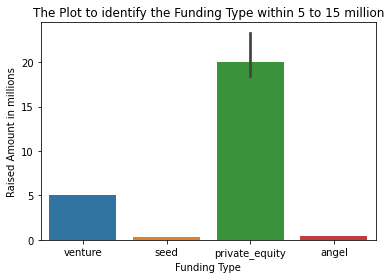

In [113]:
### Ploting the data with the estimator as median as we have seen before that there are more outliers
sns.barplot(data = Plot_1, x="funding_round_type", y ="raised_amount_usd", estimator =np.median)
plt.title('The Plot to identify the Funding Type within 5 to 15 million')
plt.xlabel("Funding Type")
plt.ylabel("Raised Amount in millions")
plt.show()

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.      

In [114]:
#### Previously used english_country_list_codes has top 9 countries
english_country_list_codes

['USA', 'GBR', 'IND', 'CAN', 'AUS', 'BMU', 'NZL', 'GIB', 'IRL']

In [115]:
### Plot for the Funding Type Venture and the English country list filtered data
Plot_2 = top9[(top9.country_code.isin(english_country_list_codes))].pivot_table(
    values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum').sort_values(
    by='raised_amount_usd', ascending=False)

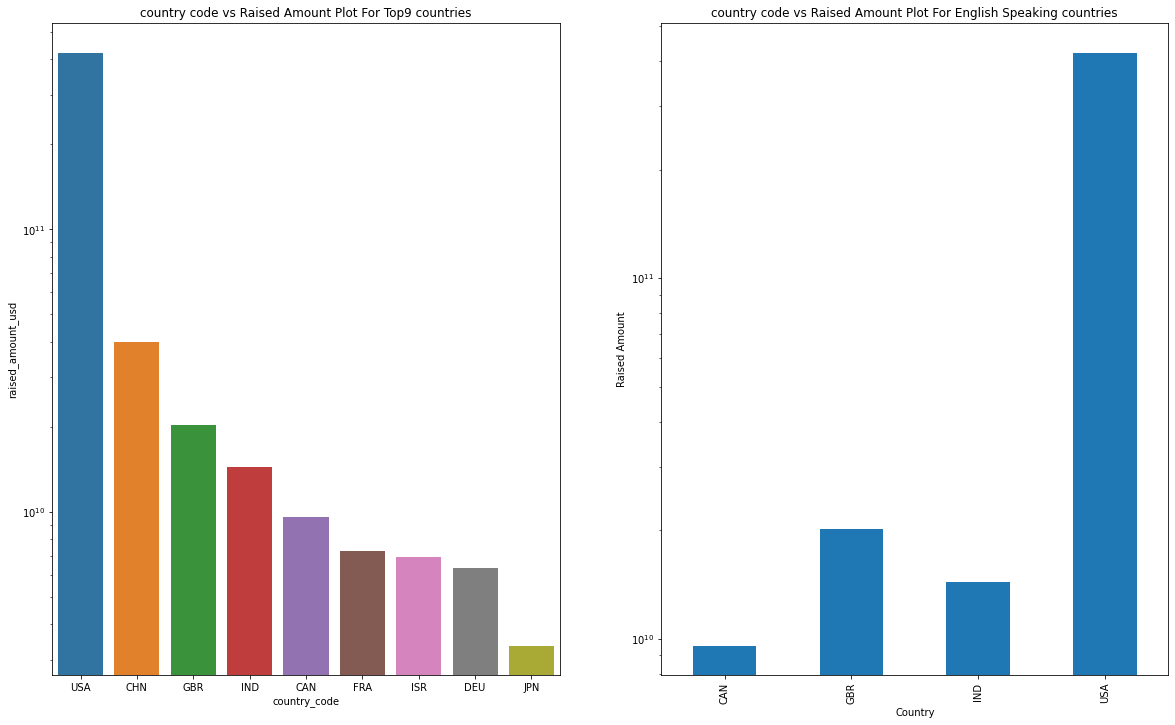

In [116]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
plt.title("country code vs Raised Amount Plot For Top9 countries")
sns.barplot(data = top9, x="country_code", y ="raised_amount_usd", estimator =np.sum)
plt.yscale("log")
plt.subplot(1,2,2)
Plot_2.groupby(['country_code']).raised_amount_usd.sum().plot(kind='bar' , x='country_code', y='raised_amount_usd')
plt.title("country code vs Raised Amount Plot For English Speaking countries")
plt.xlabel("Country")
plt.ylabel("Raised Amount")
plt.yscale("log")
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [117]:
Plot_3 = Newmaster_frame

In [118]:
Plot_3.head()

,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Entertainment


In [119]:
### Taking the Data which was grouped earlier based on the country USA, with the pivot table created for the data,
### Mainsector grouping and the Total amount investment and the Total number of investment
Plot_D1 = D1_grouping.sort_values(by='Total_Count', ascending=False).head(3)
Plot_D1 = Plot_D1.drop('Total_Amount', axis = 1)
Plot_D1 = Plot_D1.reset_index()
Plot_D1

,main_sector,Total_Count
0,Others,2950
1,"Social, Finance, Analytics, Advertising",2714
2,Cleantech / Semiconductors,2300


In [120]:
### Taking the Data which was grouped earlier based on the country GBR, with the pivot table created for the data,
### Mainsector grouping and the Total amount investment and the Total number of investment
Plot_D2 = D2_grouping.sort_values(by='Total_Count', ascending=False).head(3)
Plot_D2 = Plot_D2.drop('Total_Amount', axis = 1)
Plot_D2 = Plot_D2.reset_index()
Plot_D2

,main_sector,Total_Count
0,Others,147
1,"Social, Finance, Analytics, Advertising",133
2,Cleantech / Semiconductors,128


In [121]:
### Taking the Data which was grouped earlier based on the country IND, with the pivot table created for the data,
### Mainsector grouping and the Total amount investment and the Total number of investment
Plot_D3 = D3_grouping.sort_values(by='Total_Count', ascending=False).head(3)
Plot_D3 = Plot_D3.drop('Total_Amount', axis = 1)
Plot_D3 = Plot_D3.reset_index()
Plot_D3

,main_sector,Total_Count
0,Others,110
1,"Social, Finance, Analytics, Advertising",60
2,"News, Search and Messaging",52


In [122]:
### Merging all the three country data into one dataframe
Plot_3 = Plot_D1.merge(Plot_D2,on='main_sector', how='outer').merge(Plot_D3,on='main_sector', how='outer')

In [123]:
Plot_3

,main_sector,Total_Count_x,Total_Count_y,Total_Count
0,Others,2950.0,147.0,110.0
1,"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
2,Cleantech / Semiconductors,2300.0,128.0,NaN
3,"News, Search and Messaging",NaN,NaN,52.0


In [124]:
### Renaming the columns and filling the NaN values
Plot_3 = Plot_3.rename(columns ={'Total_Count_x':'USA','Total_Count_y': 'GBR','Total_Count':'IND'})

Plot_3 = Plot_3.fillna(0)

Plot_3

,main_sector,USA,GBR,IND
0,Others,2950.0,147.0,110.0
1,"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
2,Cleantech / Semiconductors,2300.0,128.0,0.0
3,"News, Search and Messaging",0.0,0.0,52.0


In [125]:
Plot_3 = Plot_3.set_index('main_sector')

In [126]:
Plot_3

,USA,GBR,IND
main_sector,,,
Others,2950.0,147.0,110.0
"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
Cleantech / Semiconductors,2300.0,128.0,0.0
"News, Search and Messaging",0.0,0.0,52.0


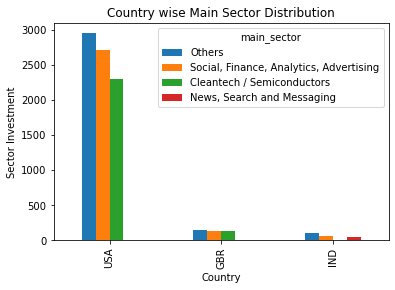

In [127]:
### Plot for the country wise three sector investment details
Plot_3.T.plot(kind="bar")
plt.title("Country wise Main Sector Distribution")
plt.xlabel("Country")
plt.ylabel("Sector Investment")
plt.show()

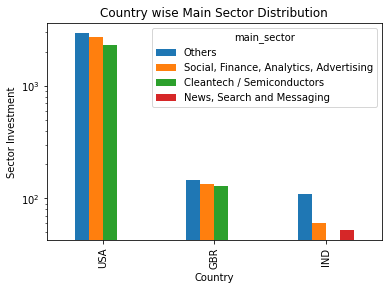

In [128]:
### Plot for the country wise three sector investment details in log scale, since the view is not proper in before graph
Plot_3.T.plot(kind="bar")
plt.yscale("log")
plt.title("Country wise Main Sector Distribution")
plt.xlabel("Country")
plt.ylabel("Sector Investment")
plt.show()